# 1) Optimization via Gradient Descent

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1) Write a script that implement the GD algorithm

In [18]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [19]:
def GD(f,                           # Function we want to optimize
       grad_f,                      # Gradient
       x0,                          # Startig point
       kmax,                        # Maximum number of iterations
       tolx,                        # ...
       tolf,                        # ...
       alpha=0,                     # ...
    ):
    """
    Returns the following values:
    x: ndarray. Array of iterate.
    k: int. Number of iterations.
    f_val: ndarray. Array of f(x) values.
    grads: ndarray. Array of gradient values.
    err: ndarray. Array of error values.
    """
    # If alpha is not given we backtrack
    backtracking_enabled = (alpha==0)
    
    # Iniizialize the containers
    x, f_val, grads, err = [], [], [], []
    
    # Pass actual value to next iteration
    x_old = x0
    
    for k in range(kmax):
        # Update containers
        x.append(x_old)
        f_val.append(f(x_old))
        grads.append(grad_f(x_old))
        err.append(np.linalg.norm(grads[-1], 2))
        
        # Compute backtracking
        if backtracking_enabled: 
            alpha = backtracking(f, grad_f, x_old)
        
        # Compute the new value
        x_k = x_old - alpha * grad_f(x_old)
        
        # Check the stop condition
        if np.linalg.norm(grad_f(x_k), 2) <= tolf * np.linalg.norm(grad_f(x0), 2):
            break
        if np.linalg.norm(x_k - x_old, 2) <= tolx:
            break
        
        # Pass actual value to next iteration
        x_old = x_k
    
    return np.array(x), k-1, np.array(f_val), np.array(grads), np.array(err)

## 1.2) Test the algorithm above on the following functions

In [20]:
# Utility functions
def plot_with_x_true(title, x, x_sol, err, k, x_true, alpha=0):
    print(f'alpha fixed at: {alpha}') if alpha != 0 else print('Alpha calculated with backtracking')
    print(f'Calculated x*:{x_sol}')
    print(f'Required iterations: {k}')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(fr'{title}')
    ax1.plot(err)
    ax1.set_title(rf'Gradient norm')
    ax1.grid()
    ax2.plot(np.linalg.norm(x - x_true, axis=1))
    ax2.set_title(r'$\|x_k - x*\|_2$' )
    plt.grid()
    plt.show()

def plot_without_x_true(title, x_sol, err, k, alpha=0):
    print(f'alpha fixed at: {alpha}') if alpha != 0 else print('Alpha calculated with backtracking')
    print(f'Calculated x*:{x_sol}')
    print(f'Required iterations: {k}')
    plt.plot(err)
    plt.title(fr'Gradient norm for {title}')
    plt.grid()
    plt.show()

### 1.2.1) $f(x_1, x_2)=(x_1-3)^2+(x_2-1)^2$
The true optimum is $x^{*}=(3,1)^T$


In [21]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 3)**2 + (x2 - 1)**2
def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1 - 3), 2*(x2 - 1)])

(81, 2) (81,) (81, 2) (81,)
Alpha calculated with backtracking
Calculated x*:[2.99993117 0.99997706]
Required iterations: 79


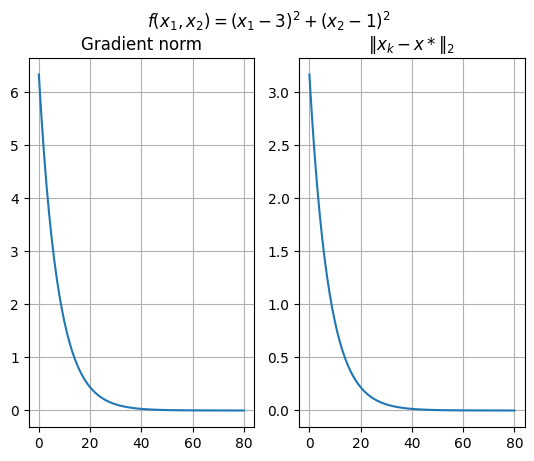

alpha fixed at: (0, 0.1)
Calculated x*:[0.         0.99995644]
Required iterations: 44


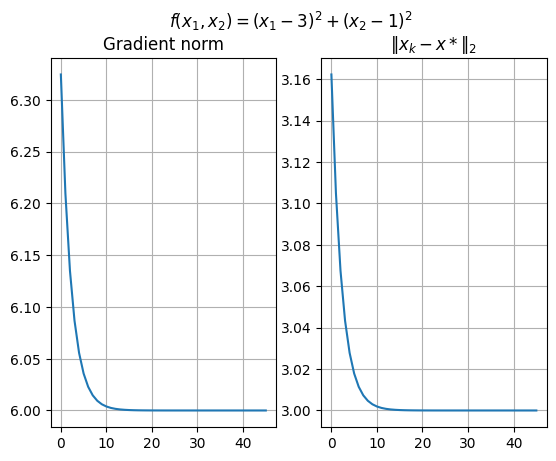

alpha fixed at: (1, 0.01)
Calculated x*:[6.         0.86467392]
Required iterations: 98


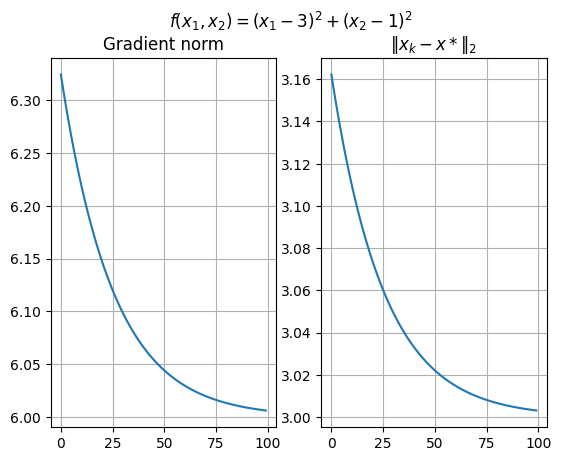

alpha fixed at: (2, 0.001)
Calculated x*:[5.15377521e+47 1.79792781e-01]
Required iterations: 98


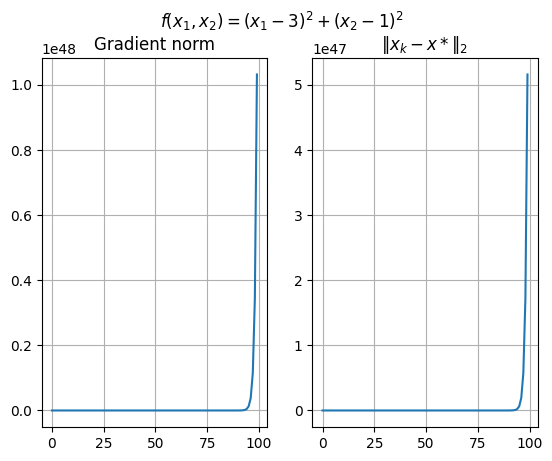

In [22]:
x_true =np.array([3,1])
x0 = np.array([0, 0])
kmax = 100
tolf = tolx = 1e-5
x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf)
print(x.shape, f_val.shape, grads.shape, err.shape)
plot_with_x_true('$f(x_1, x_2) = (x_1-3)^2+(x_2-1)^2$',x, x[-1], err, k, x_true=x_true)
alphas = [0.1, 0.01, 0.001]

for alpha in enumerate(alphas):
    x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf, alpha=alpha)
    plot_with_x_true('$f(x_1, x_2) = (x_1-3)^2+(x_2-1)^2$', x, x[-1], err, k, x_true=x_true,alpha=alpha)

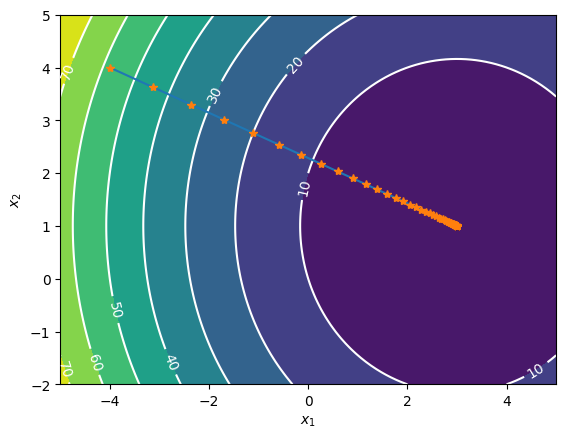

In [23]:
# Also plot the contour around the minimum and the path defined by the iterations 
X1, X2 = np.meshgrid(np.linspace(-5,5,100),np.linspace(-2,5,100))
Y = f((X1,X2))
x0 = [-4,4]
x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf)
cp = plt.contour(X1, X2, Y, colors='white')
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y )
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.plot(x[:,0],x[:,1])
plt.plot(x[:,0],x[:,1], '*',)
plt.show()

### 1.2.2) $f(x_1, x_2)=10(x_1-1)^2+(x_2-2)^2$
The true optimum is $x^{*}=(1,2)^T$


In [24]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 10 * ((x1 - 1)**2) + (x2 - 2)**2
def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1 - 1), 2*(x2 - 2)])

Alpha calculated with backtracking
Calculated x*:[1.         1.99989307]
Required iterations: 78


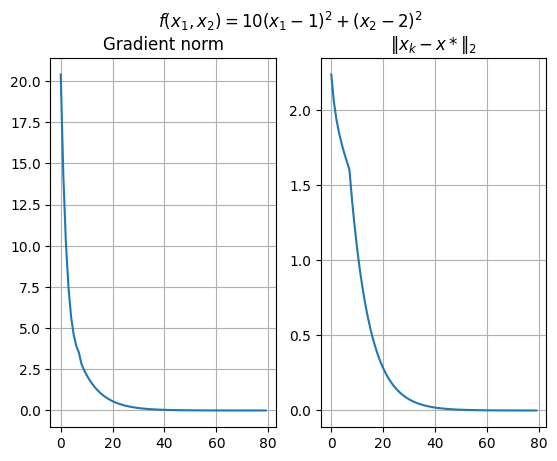

alpha fixed at: 0.1
Calculated x*:[2. 2.]
Required iterations: 98


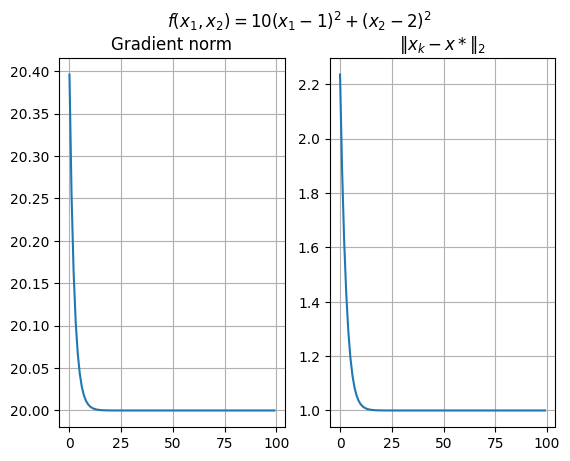

alpha fixed at: 0.01
Calculated x*:[1.         1.72934785]
Required iterations: 98


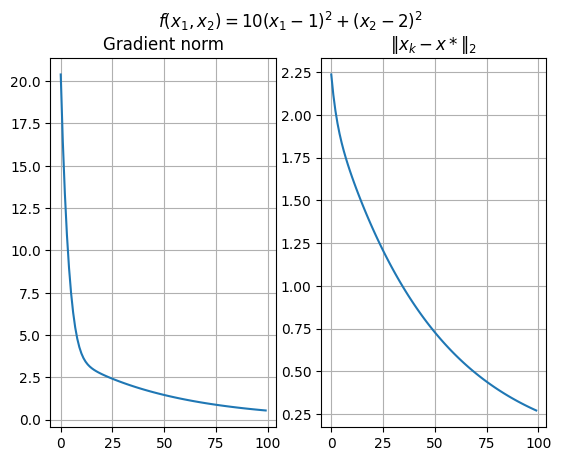

alpha fixed at: 0.001
Calculated x*:[0.86467392 0.35958556]
Required iterations: 98


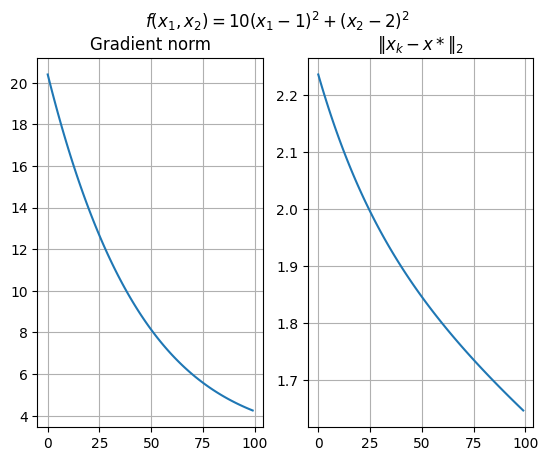

In [25]:
x_true =np.array([1,2])
x0 = np.array([0, 0])
kmax = 100
tolf = tolx = 1e-5
x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf)
plot_with_x_true('$f(x_1, x_2) = 10(x_1-1)^2+(x_2-2)^2$', x, x[-1], err, k, x_true=x_true)

for alpha in (0.1, 0.01, 0.001):
    x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf, alpha=alpha)
    plot_with_x_true('$f(x_1, x_2) = 10(x_1-1)^2+(x_2-2)^2$', x, x[-1], err, k, x_true=x_true,alpha=alpha)

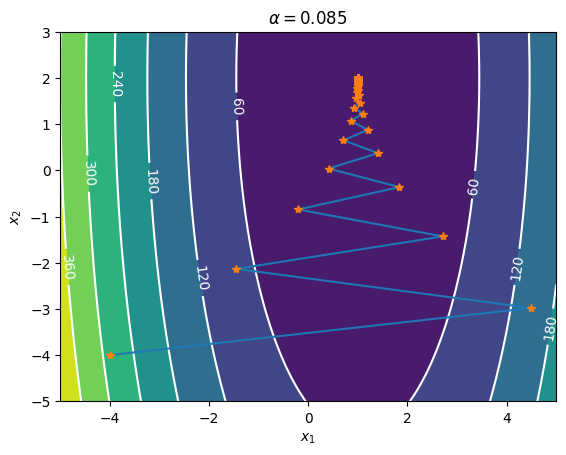

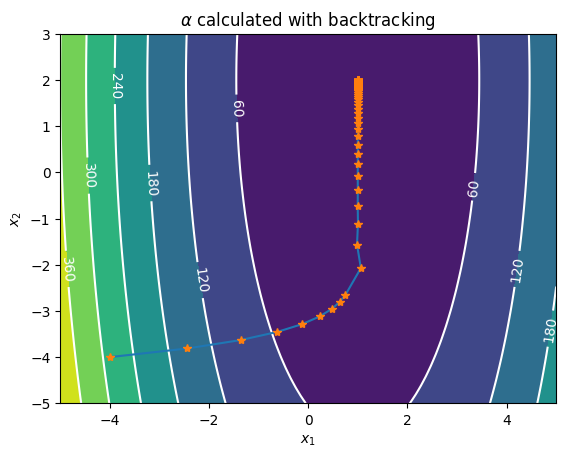

In [26]:
# plot the contour around the minimum and the path defined by the iterations

X1, X2 = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,3,100))
Y = f((X1,X2))
x0 = [-4,-4]

# Fixed alpha
x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf, alpha=0.085)
cp = plt.contour(X1, X2, Y, colors='white')
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y )
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'$\alpha = 0.085$')
plt.plot(x[:,0],x[:,1]) 
plt.plot(x[:,0],x[:,1], '*',)
plt.show()

# Alpha calculated with backtracking
x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf)
cp = plt.contour(X1, X2, Y, colors='white')
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y )
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'$\alpha$ calculated with backtracking')
plt.plot(x[:,0],x[:,1]) 
plt.plot(x[:,0],x[:,1], '*',)
plt.show()

### 1.2.3) $f(x)=\frac{1}{2}||Ax-b||_2^2$

The true is $x_{true} = [1,1,...,1]^T$ and $b=Ax_{true}$

In [27]:
def f(x):
    v = np.linspace(0, 1, x.shape[0])
    A = np.vander(v)
    x_true = np.ones((v.shape[0],)).T
    b = A @ x_true 
    return 0.5 * np.linalg.norm(A@x - b)**2

def grad_f(x):
    v = np.linspace(0, 1, x.shape[0])
    A = np.vander(v)
    x_true = np.ones((v.shape[0],)).T
    b = A @ x_true 
    res = np.array(A@(A@x - b))
    return res


n=5




Alpha calculated with backtracking
Calculated x*:[0.91245749 0.98218159 1.03707754 1.05247741 0.99323362]
Required iterations: 98


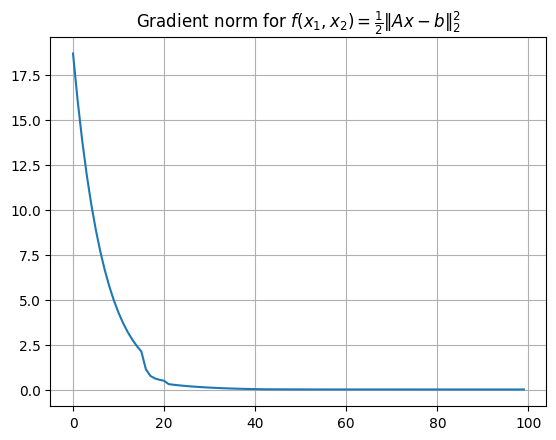


n=10


Alpha calculated with backtracking
Calculated x*:[0.85321086 0.89103777 0.93091173 0.97226481 1.01379152 1.05270927
 1.08333647 1.09450668 1.06512648 0.9569329 ]
Required iterations: 98


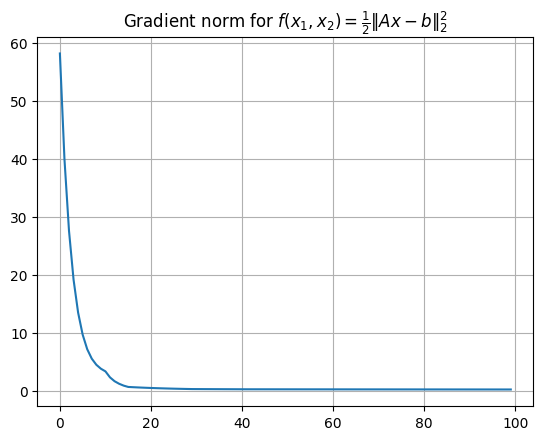


n=15


Alpha calculated with backtracking
Calculated x*:[0.93482192 0.95199128 0.96876764 0.98484881 0.9998336  1.01319221
 1.02423171 1.0320641  1.03559951 1.03362459 1.02510533 1.01001327
 0.99127418 0.9789735  0.99886372]
Required iterations: 98


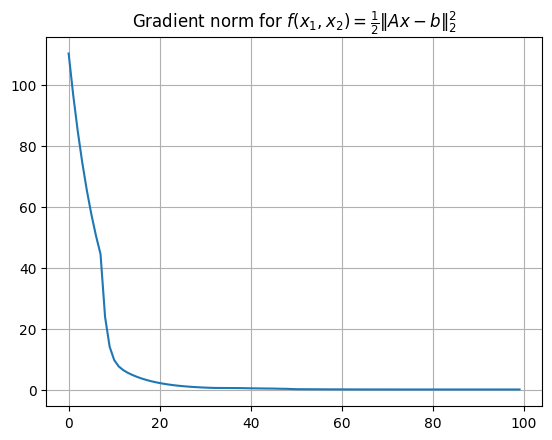


n=20


Alpha calculated with backtracking
Calculated x*:[0.91977969 0.93366953 0.94753796 0.96129222 0.97481405 0.98795292
 1.00051725 1.01226334 1.02288134 1.03197806 1.03905717 1.04349966
 1.04455391 1.04135913 1.03306087 1.01915212 1.00033277 0.98050304
 0.97114038 1.00051245]
Required iterations: 98


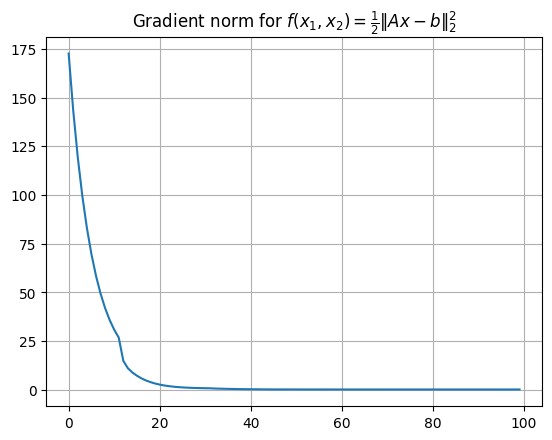



Set n=5 and trying different step-size values


alpha fixed at: 0.1
Calculated x*:[0.95790278 0.9995457  1.02471928 1.02473019 0.98996291]
Required iterations: 98


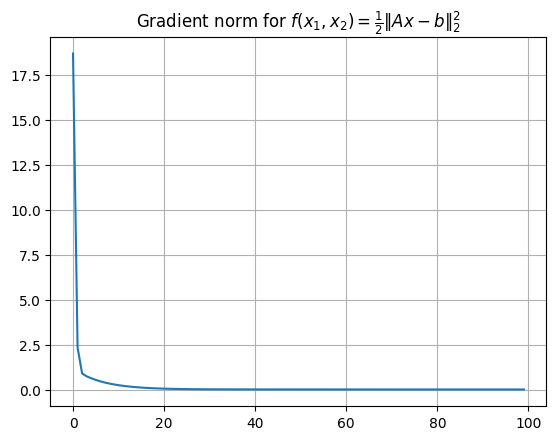

alpha fixed at: 0.01
Calculated x*:[0.81963738 0.90159587 0.98445228 1.05473617 1.09230819]
Required iterations: 98


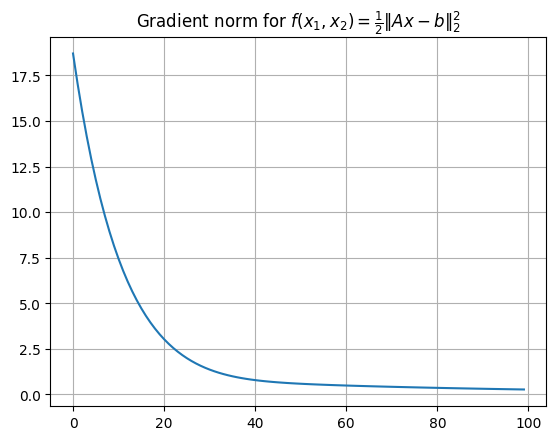

alpha fixed at: 0.001
Calculated x*:[0.34664892 0.40553419 0.4893352  0.61276288 0.79558222]
Required iterations: 98


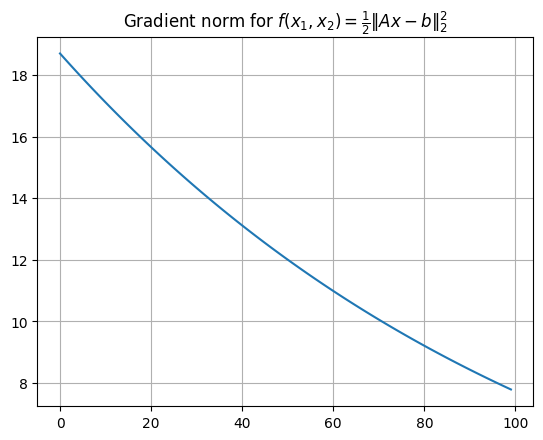

In [28]:
for n in (5, 10, 15, 20):
    print(f'\nn={n}\n\n')
    x0 = np.array(np.zeros((n,)))
    kmax = 100
    tolf = tolx = 1e-5
    x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf)

    plot_without_x_true('$f(x_1, x_2) = \\frac{1}{2}\|Ax-b\|^2_2$', x[-1], err, k)

n = 5
x0 = np.array(np.zeros((n,)))
print('\n\nSet n=5 and trying different step-size values\n\n')
for alpha in (0.1, 0.01, 0.001):
    x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf, alpha=alpha)
    plot_without_x_true('$ f(x_1, x_2) = \\frac{1}{2}\|Ax-b\|^2_2$', x[-1], err, k, alpha=alpha)

### 1.2.4) $f(x)=\frac{1}{2}||Ax-b||_2^2 + \frac{\lambda}{2}||x||_2^2$

Alpha calculated with backtracking
Calculated x*:[0.90546325 0.97443407 1.02931989 1.04666523 0.99310711]
Required iterations: 98


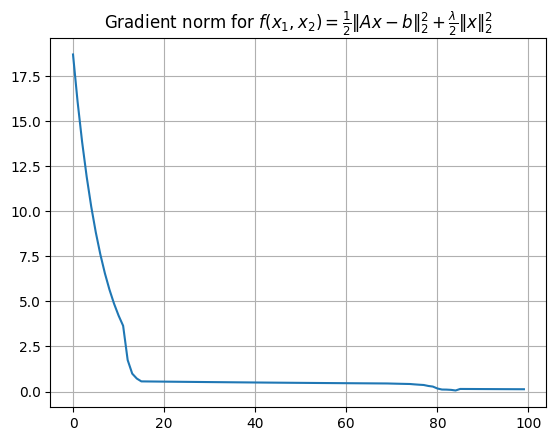

alpha fixed at: 0.1
Calculated x*:[0.91005651 0.964962   1.00745125 1.02484638 1.00052798]
Required iterations: 98


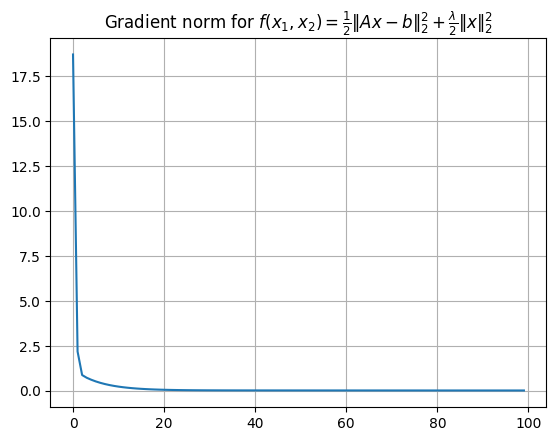

alpha fixed at: 0.01
Calculated x*:[0.80209964 0.88385898 0.96803548 1.04270532 1.08989994]
Required iterations: 98


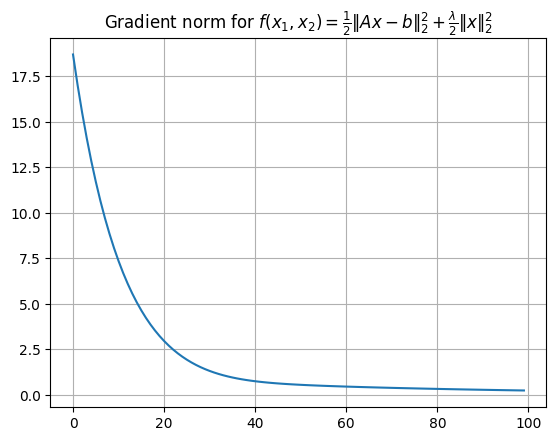

alpha fixed at: 0.001
Calculated x*:[0.34515832 0.40379819 0.48725489 0.61018311 0.79227262]
Required iterations: 98


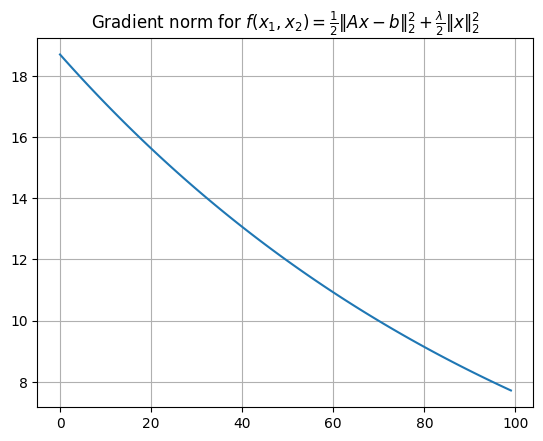

In [50]:
def f(x):
    v = np.linspace(0, 1, x.shape[0])
    A = np.vander(v)
    x_true = np.ones((v.shape[0],)).T
    b = A @ x_true 
    lmbda = 0.1
    return 0.5 * np.linalg.norm(A@x - b)**2 + lmbda/2*np.linalg.norm(x)

def grad_f(x):
    v = np.linspace(0, 1, x.shape[0])
    A = np.vander(v)
    x_true = np.ones((v.shape[0],)).T
    b = A @ x_true 
    lmbda = 0.1
    res = A@(A@x - b) + lmbda*x
    return res

n=5
x0 = np.array(np.zeros((n,)))
kmax = 100
tolf = tolx = 1e-5
x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf)

plot_without_x_true('$f(x_1, x_2) = \\frac{1}{2}\|Ax-b\|^2_2+\\frac{\lambda}{2}\|x\|^2_2$', x[-1], err, k)

for alpha in (0.1, 0.01, 0.001):
    x, k, f_val, grads, err = GD(f, grad_f, x0, kmax, tolx, tolf, alpha=alpha)
    plot_without_x_true('$ f(x_1, x_2) = \\frac{1}{2}\|Ax-b\|^2_2+\\frac{\lambda}{2}\|x\|^2_2$', x[-1], err, k, alpha=alpha)

### 1.2.5) $f(x) = x^4 + x^3 -2x^2 -2x$

We can observe:
- local minimum : 
- local maximum : 

In [51]:
# difference with multidimensional gradient: norms -> abs
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.abs(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            break
    return alpha

def one_dim_GD(f, grad_f, x0, kmax, tol_x, tol_f, alpha=0):
    x = []
    f_val = []
    grads = []
    err = []
    backtrack = alpha == 0
    x_old = x0
    k = 0
    condition = True
    while condition:
        x.append(x_old)
        f_val.append(f(x_old))
        grads.append(grad_f(x_old))
        err.append(np.abs(grads[-1]))
        if backtrack:
            alpha = backtracking(f, grad_f, x_old)
        x_k = x_old - alpha * grad_f(x_old)
        condition1 = np.abs(grad_f(x_k)) > tol_f * np.abs(grad_f(x0))
        condition2 =  np.abs(x_k - x_old) > tol_x
        condition3 = k < kmax
        condition = condition1 & condition2 & condition3
        k += 1
        x_old = x_k
    return np.array(x), k-1, np.array(f_val), np.array(grads), np.array(err)

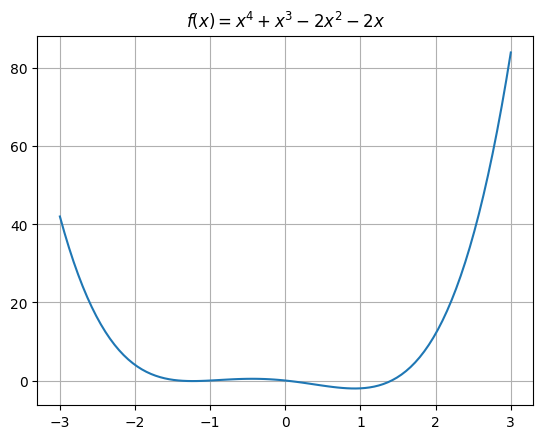

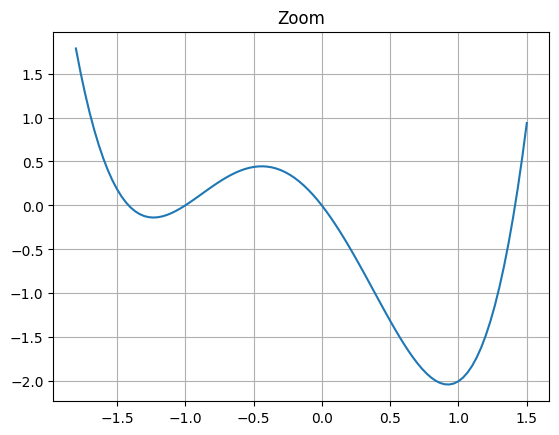

x0=-2.0
Alpha calculated with backtracking
Calculated x*:-1.2323263018839814
Required iterations: 74


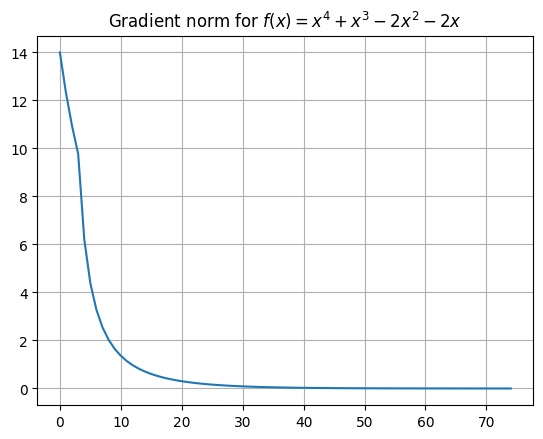

x0=-1.5
Alpha calculated with backtracking
Calculated x*:-1.2323295188844188
Required iterations: 67


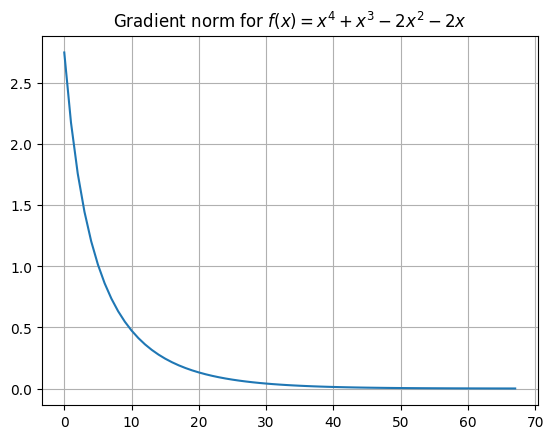

x0=-0.5
Alpha calculated with backtracking
Calculated x*:-1.2321493943750748
Required iterations: 55


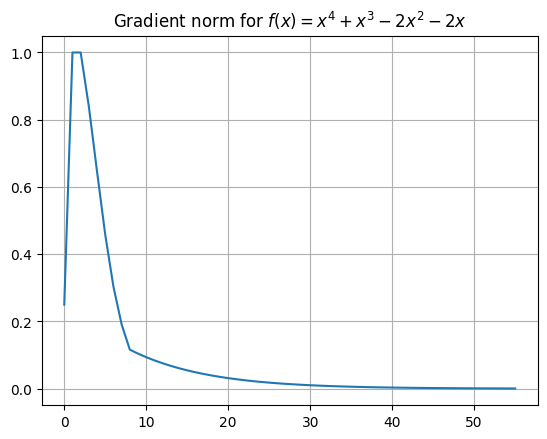

x0=0.0
Alpha calculated with backtracking
Calculated x*:0.9221740007054371
Required iterations: 46


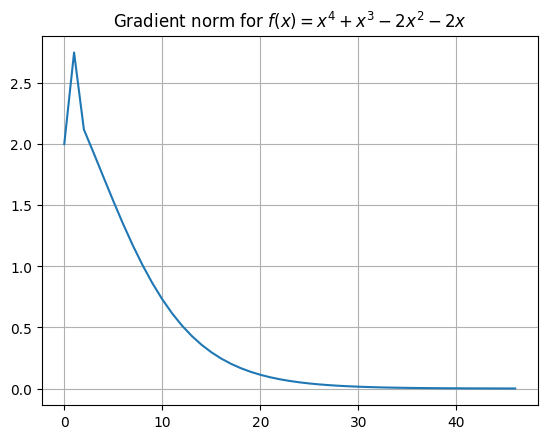

x0=0.5
Alpha calculated with backtracking
Calculated x*:0.9221740007054371
Required iterations: 45


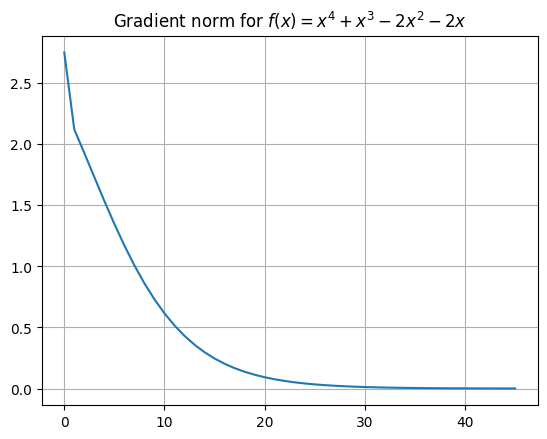

x0=-0.4
alpha fixed at: 0.2
Calculated x*:1.0926030185993145
Required iterations: 100


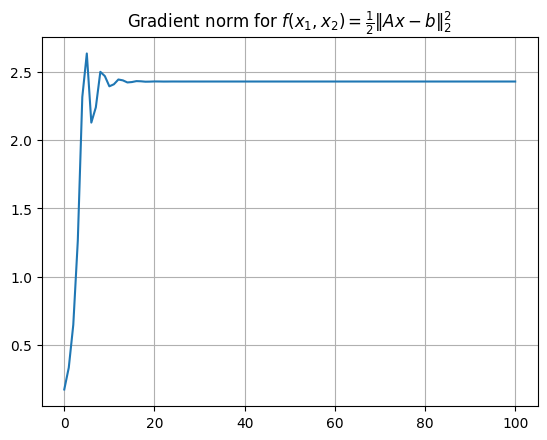

x0=-0.4
alpha fixed at: 0.1
Calculated x*:0.9222299648137409
Required iterations: 15


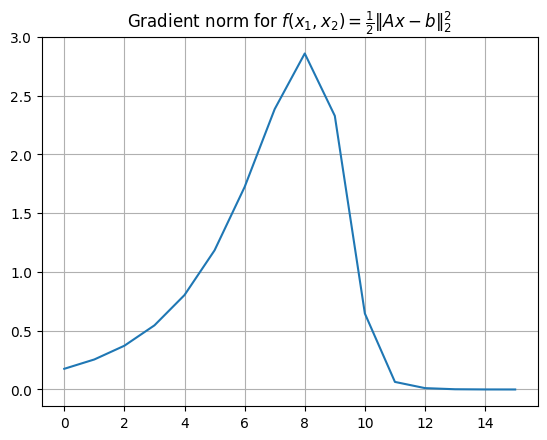

x0=-0.4
alpha fixed at: 0.01
Calculated x*:0.8920153931685103
Required iterations: 100


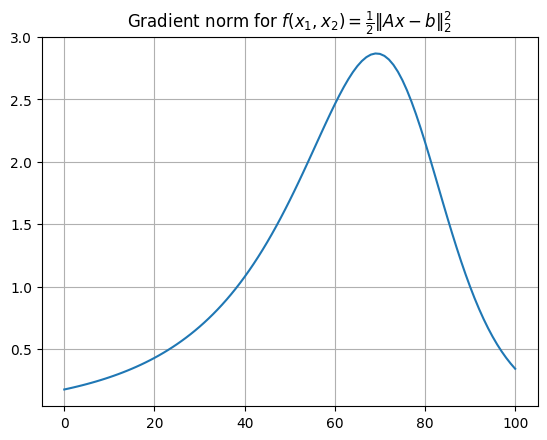

x0=-0.4
alpha fixed at: 0.005
Calculated x*:-0.06423180870888803
Required iterations: 100


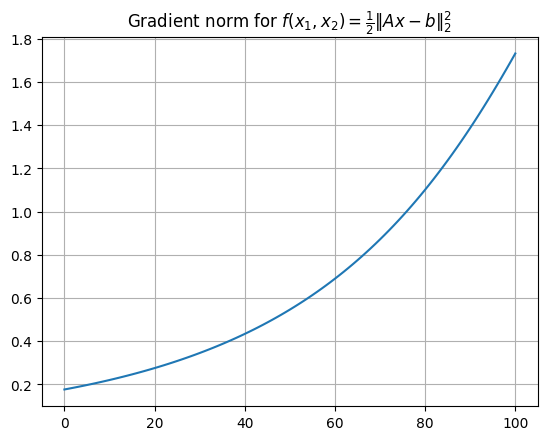

In [52]:
def f(x):
    return x**4 + x**3  -2*(x**2) - 2*x
def grad_f(x):
    return 4*(x**3) + 3*(x**2)  -4*x - 2

x = np.linspace(-3, 3, 100)
y = f(x)
plt.plot(x,y)
plt.title(r'$f(x) = x^4 + x^3 -2x^2 -2x$')
plt.grid()
plt.show()
x = np.linspace(-1.8, 1.5, 100)
y = f(x)
plt.plot(x,y)
plt.title('Zoom')
plt.grid()
plt.show()

x0s = np.array([-2, -1.5, -0.5, 0, 0.5])
for x0 in x0s:
    print(f'x0={x0}')
    kmax = 100
    tolf = tolx = 1e-5
    x, k, f_val, grads, err = one_dim_GD(f, grad_f, x0, kmax, tolx, tolf)

    plot_without_x_true('$f(x) = x^4 + x^3 -2x^2 -2x$', x[-1], err, k)

x0= -0.4
for alpha in (0.2, 0.1, 0.01, 0.005):
    print(f'x0={x0}')
    x, k, f_val, grads, err = one_dim_GD(f, grad_f, x0, kmax, tolx, tolf, alpha=alpha)
    plot_without_x_true('$f(x) = x^4 + x^3 -2x^2 -2x$', x[-1], err, k, alpha=alpha)

# 2) Optimization via Stochastic Gradient Descent

## 2.1) Read data

In [37]:
import pandas as pd

data = pd.read_csv('../homework_2/data.csv')
data = np.array(data)
X = data[:, 1:].T
Y = data[:, :1].T
d, N = X.shape
print(X.shape)
X_hat = np.insert(X, obj=0, values=1, axis=0) # for regression
print(X_hat.shape)
print(X_hat[0,:])

(784, 42000)
(785, 42000)
[1 1 1 ... 1 1 1]


## 2.2) Functions

### 2.2.1) Train and test

In [38]:
def train_test_split (X, Y, N, train_size) :
    N_train = round(N * train_size)
    idx = np.arange(0, N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:, train_idx]
    Y_train = Y[:, train_idx]

    X_test = X[:, test_idx]
    Y_test = Y[:, test_idx]
    return X_train, X_test, Y_train, Y_test

### 2.2.2) Functions

In [39]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def f(x_hat, w):
    return sigmoid(x_hat.T @ w)
def grad_f(x_hat, w):
    sig = sigmoid(x_hat.T @ w)
    return sig @ (1 - sig) @ x_hat.T

def loss(w, D):
    X,y = D
    k, N = X.shape
    y_pred = f(X, w)
    return 1/(2*N) * (np.linalg.norm(y_pred - y)**2)

def grad_loss(w, D):
    X,y = D
    k, N = X.shape
    sig = sigmoid(X.T @ w)
    res = 1/N * X @ ( sig * (1 - sig) * (f(X, w) - y))
    return res

## 2.3) Write a Python script that implement the SGD algorithm

In [40]:
def  SGD(loss, grad_loss, W0, D, batch_size, n_epochs, learning_rate  = 0.001):
    #Extracting X, Y from D
    X, y = D
    #Save in memory the length of x (and y)
    d,N = X.shape
    # Assum batch_size divides N
    # Compute the number of batches per epoch
    n_batch_per_epoch = N // batch_size

    #Initialize all variables to return
    w = np.empty((0, d))
    f_val = np.empty((0,n_epochs))
    grads = np.empty((0,d))
    err = np.empty((0,n_epochs))

    # Initialize parameter w_k
    w = np.append(w, W0.T, axis=0)
    w_k = W0
    
    # Iterate over the epochs
    for epoch in range(n_epochs):
        idx = np.arange(N)
        np.random.shuffle(idx)
        for k in range(n_batch_per_epoch):
            # Extract mini-batch
            x_temp = X[:, idx[k * batch_size : (k+1) * batch_size]]
            y_temp = y[idx[k * batch_size : (k+1) * batch_size],:]
            B = (x_temp, y_temp)
            
            # Gradient descent update 
            w_k = w_k -  learning_rate * grad_loss(w_k, B)
            w = np.append(w, w_k.T, axis=0)
    
        f_val = np.append(f_val, loss(w_k, B))
        grads = np.append(grads, grad_loss(w_k, B).T, axis=0)
        err = np.append(err, np.linalg.norm(grad_loss(w_k, B)))
        
    return w, f_val, grads, err

## 2.4) To test the script above

In [41]:
def backtracking(f, grad_loss, x, D):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_loss(x, D), D) > f(x, D) - c * alpha * np.linalg.norm(grad_loss(x, D), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            break
    return alpha

def GD(loss, grad_loss, x0, D, kmax, tol_x, tol_f, alpha=0):
    X, y = D
    d,N = X.shape
    
    #Initialize all variables to return
    w = np.empty((0, d))
    f_val = np.empty((0,kmax))
    grads = np.empty((0,d))
    err = np.empty((0,kmax))
    w = np.append(w, x0.T, axis=0)
    f_val = np.append(f_val, loss(x0, D))
    grads = np.append(grads, grad_loss(x0, D).T, axis=0)
    err = np.append(err, np.linalg.norm(grad_loss(x0, D)))

    backtrack = alpha == 0
    x_old = x0
    k = 0
    condition = True
    while condition:
        if backtrack:
            alpha = backtracking(loss, grad_loss, x_old, D)
        x = x_old - alpha * grad_loss(x_old, D)
        condition1 = np.linalg.norm(grad_loss(x, D), 2) > tol_f * np.linalg.norm(grad_loss(x0, D), 2)
        condition2 =  np.linalg.norm(x - x_old, 2) > tol_x
        condition3 = k < kmax
        condition = condition1 & condition2 & condition3
        k += 1
        x_old = x
        w = np.append(w, x.T, axis=0)
        f_val = np.append(f_val, loss(x, D))
        grads = np.append(grads, grad_loss(x, D).T, axis=0)
        err = np.append(err, np.linalg.norm(grad_loss(x, D)))
    return w, k-1, f_val, grads, err

In [42]:
def predict(x, w, threshold = 0.5):
    sig = sigmoid(x.T @ w)
    if sig > threshold:
        return 1
    return 0

In [52]:
import time
def logistic_regression_classifier(X, Y, n1, n2, batch_size_sgd, n_epochs_sgd, kmax_gd, tolf_gd, tolx_gd):
    # Select only chosen digits
    digits = np.array([n1, n2])
    idx = np.isin(Y[0, :],digits)
    X_input = X[:, idx]
    Y_input = Y[:, idx]

    Y_input[Y_input == n1] = 1
    Y_input[Y_input == n2] = 0
    d, N = Y_input.shape

    # Variables to return
    train_sizes = np.array([0.05, 0.1, 0.2, 0.4, 0.6, 0.8])
    accuracies_gd = np.empty((0, 6))
    w_star_err = np.empty((0, 6))
    accuracies_sgd = np.empty((0, 6))
    gd_times = []
    sgd_times = []

    for ts in train_sizes:   
        # Split dataset
        X_train, X_test, Y_train, Y_test = train_test_split(X_input, Y_input, N,  train_size=ts)
        Y_train = Y_train.T
        Y_test = Y_test.T
        # Generate starting parameters
        w0 = np.random.uniform(-0.1,0.1,size=(785,1))

        # Optimization with Stochastic Gradient Descent
        start_time = time.time()
        w, f_val, grads, err = SGD(loss, grad_loss, w0, (X_train, Y_train), batch_size_sgd, n_epochs_sgd)
        sgd_times.append(time.time() - start_time)
        w_star_sgd = w[-1:].T 

        # Optimization with Gradient Descent
        start_time = time.time()
        w_gd, k, f_val_gd, grads_gd, err_gd = GD(loss, grad_loss, w0, (X_train, Y_train), kmax_gd, tolx_gd, tolf_gd)
        gd_times.append(time.time() - start_time)
        w_star_gd = w_gd[-1:].T
        
        # print(f"{ts}) Errore del SGD: ", np.mean(err))
        # print(f"{ts}) Errore del GD: ", np.mean(err_gd))
        # print()
        
        # Compute accuracy
        correct_gd = 0
        correct_sgd = 0
        for i in range(Y_test.shape[0]):
            x_i = X_test[:, i:i+1] #shape d+1 X N
            y_true = Y_test[i, 0]

            # Predict using GD w^star
            prediction = predict(x_i, w_star_gd)
            if y_true ==  prediction: 
                correct_gd += 1

            # Predict using SGD w^star
            prediction = predict(x_i, w_star_sgd)
            if y_true ==  prediction: 
                correct_sgd += 1
        accuracies_gd = np.append(accuracies_gd, correct_gd / Y_test.shape[0])
        accuracies_sgd = np.append(accuracies_sgd, correct_sgd / Y_test.shape[0])
        w_star_err = np.append(w_star_err, np.linalg.norm(w_star_gd - w_star_sgd))
        
    return accuracies_gd, accuracies_sgd, w_star_err, sgd_times, gd_times, train_sizes

In [53]:
def plot(accuracies_gd, accuracies_sgd, w_star_err, sgd_times, gd_times, train_sizes):
    print(f'Gradient Descent accuracy: {accuracies_gd}')
    print(f'Stochastic Gradient Descent accuracy: {accuracies_sgd}')
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(121)
    plt.plot(train_sizes, accuracies_gd, '.-')
    plt.plot(train_sizes, accuracies_sgd, '.-')
    plt.plot(train_sizes, w_star_err, '.-')
    plt.xlabel('Train size %')
    plt.ylabel('Accuracy')
    plt.legend(['Accuracy GD','Accuracy SGD','W* difference'])
    plt.grid()
    
    plt.subplot(122)
    plt.plot(train_sizes, sgd_times, '.-')
    plt.plot(train_sizes, gd_times, '.-')
    plt.legend(['SGD','GD'])
    plt.xlabel('Train size %')
    plt.ylabel('Time used')
    
    plt.show()

Choose 2 digits with that pattern: digit digit


Chosen numbers: 1, 0


/var/folders/n9/r8x6svc56fjb_2b7zb4tztr80000gn/T/ipykernel_42306/503280531.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Gradient Descent accuracy: [0.68095522 0.87408621 0.89593081 0.97258979 0.95178673 0.88031764]
Stochastic Gradient Descent accuracy: [0.69110448 0.94038316 0.96228555 0.9905482  0.98950652 0.98355077]


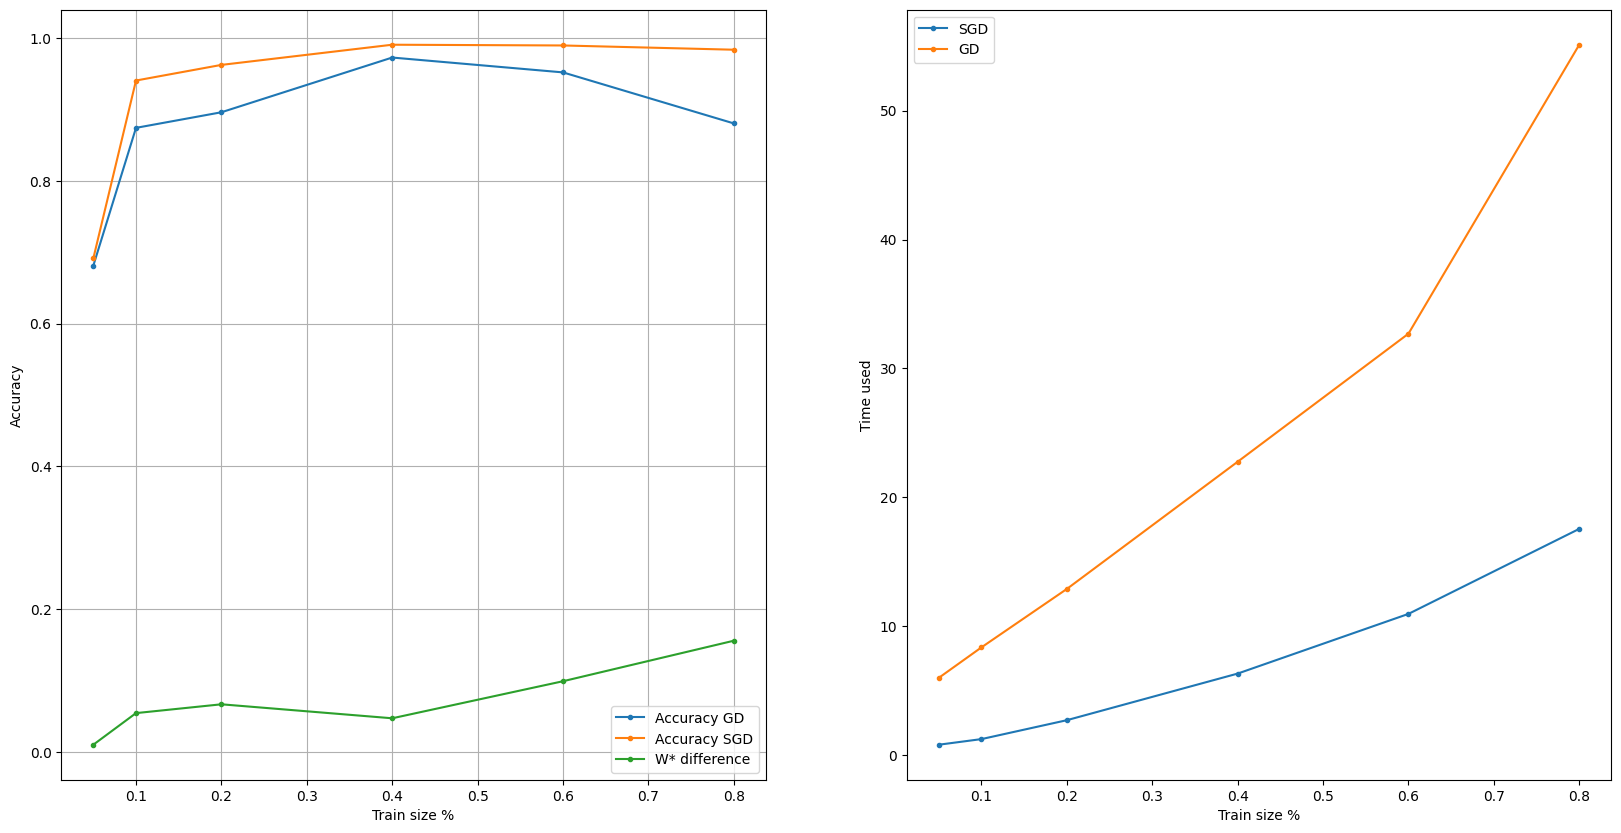

Choose 2 digits with that pattern: digit digit
Chosen numbers: 6, 9
Gradient Descent accuracy: [0.44936149 0.81516082 0.91546547 0.91071071 0.8987988  0.91591592]
Stochastic Gradient Descent accuracy: [0.4857757  0.78233017 0.91456456 0.96656657 0.96636637 0.98438438]


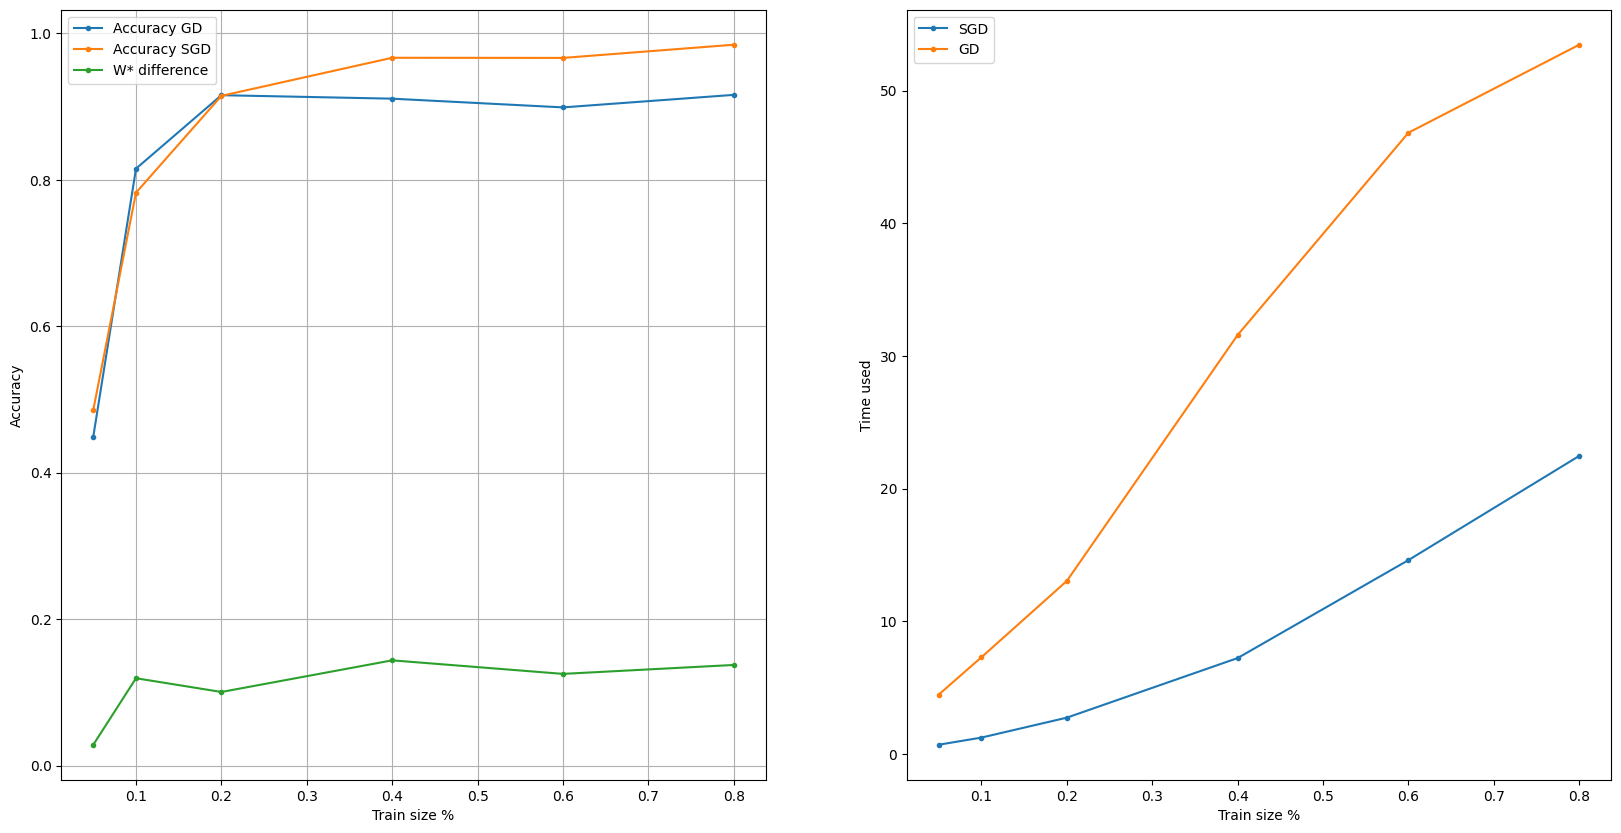

Choose 2 digits with that pattern: digit digit
Chosen numbers: 5, 6
Gradient Descent accuracy: [0.58739217 0.77223701 0.54380712 0.82580374 0.84935392 0.85624212]
Stochastic Gradient Descent accuracy: [0.62574652 0.8038941  0.85597227 0.90544232 0.92499212 0.95208071]


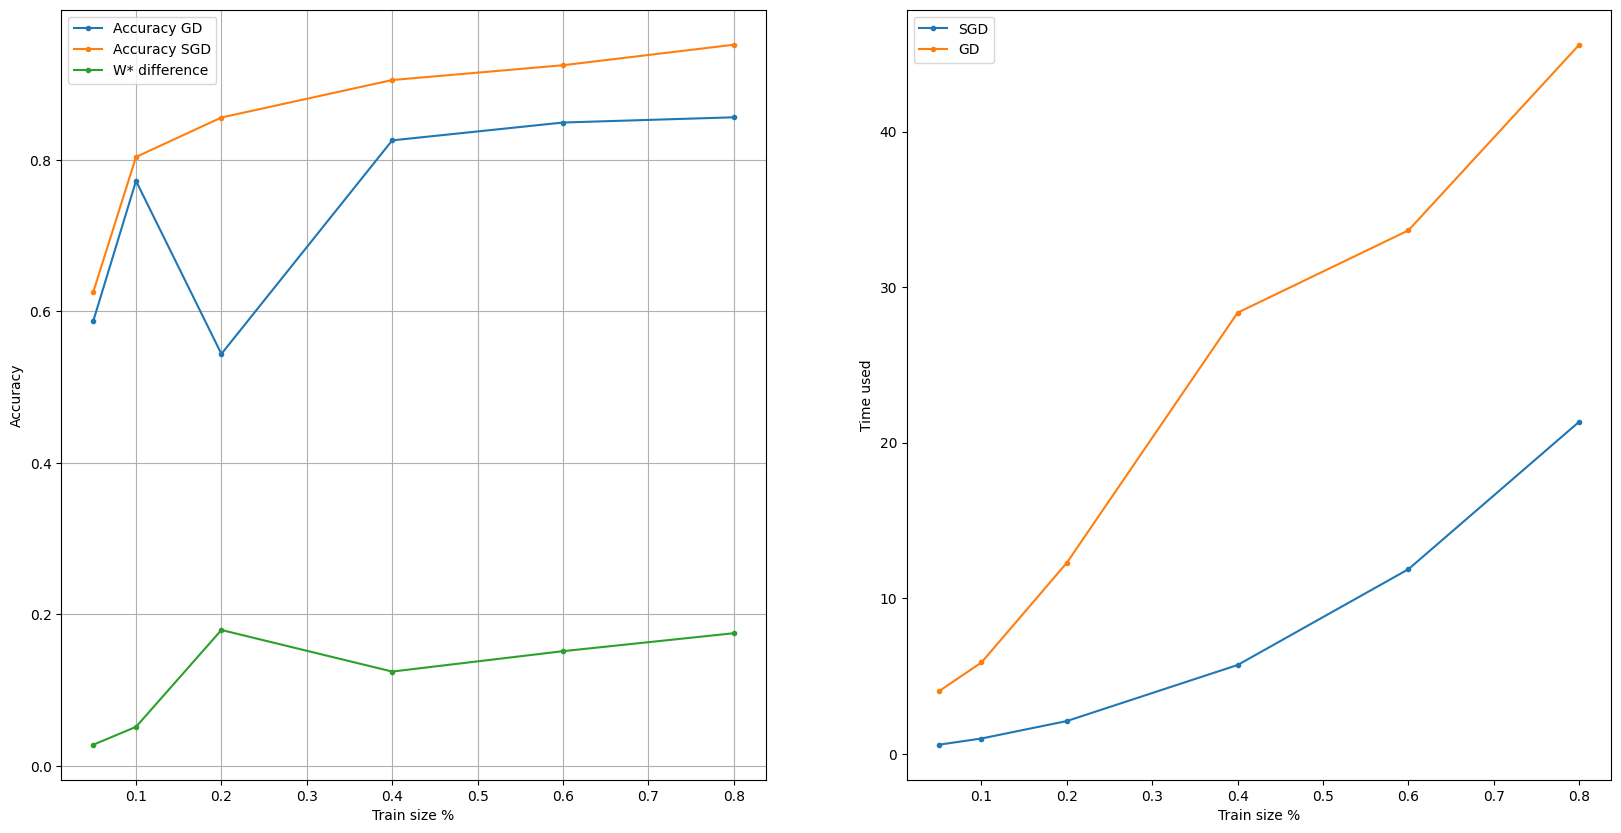

Choose 2 digits with that pattern: digit digit
Chosen numbers: 9, 0
Gradient Descent accuracy: [0.9090334  0.47489316 0.88491587 0.8515625  0.90985577 0.91346154]
Stochastic Gradient Descent accuracy: [0.53023785 0.52497329 0.90835337 0.95572917 0.96694712 0.96213942]


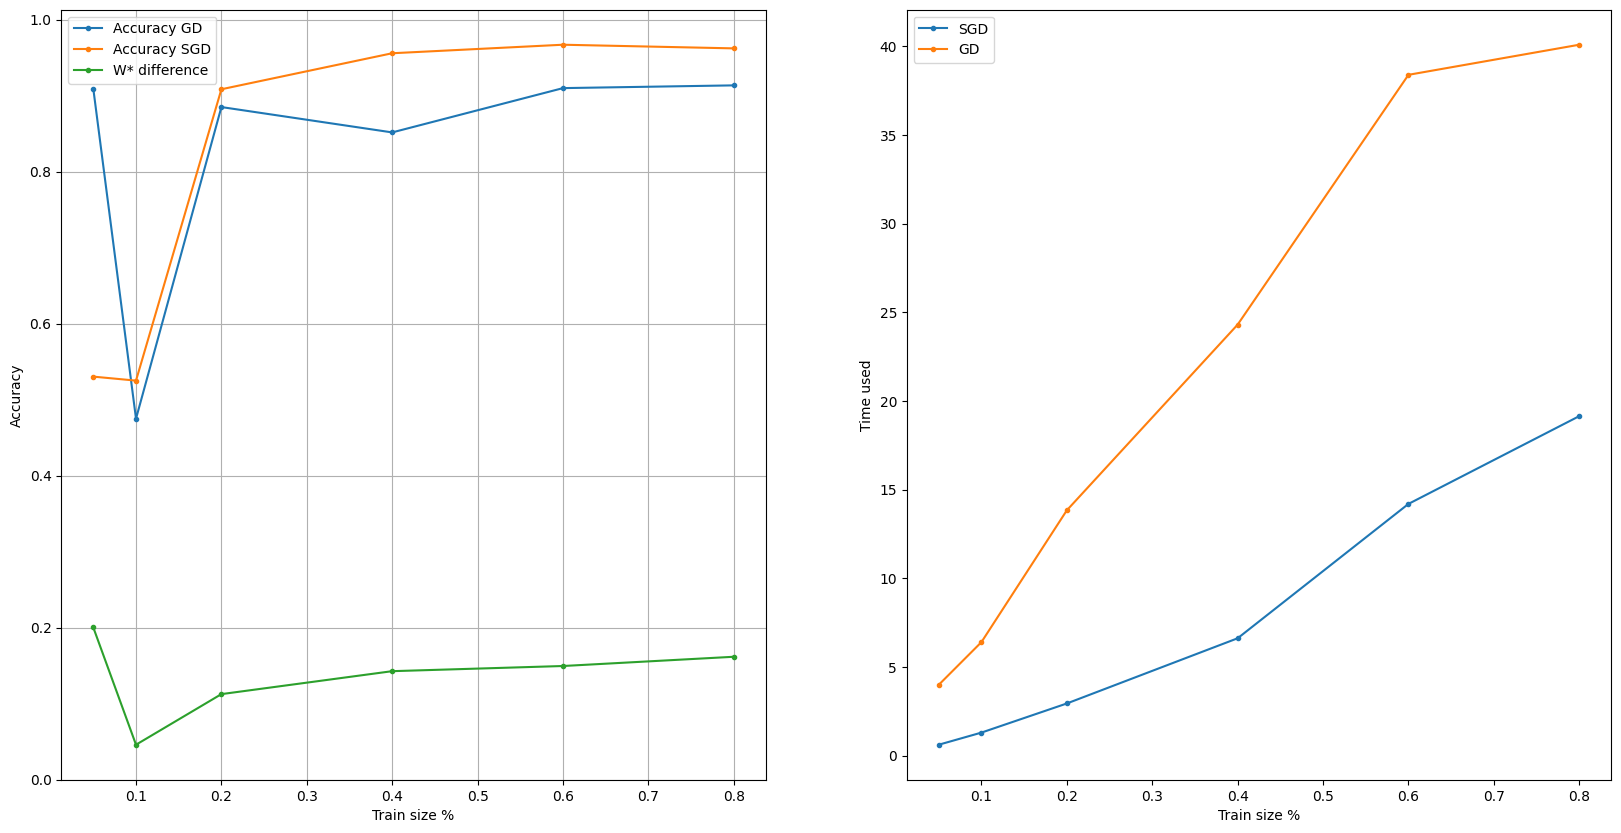

Choose 2 digits with that pattern: digit digit
Chosen numbers: 3, 5
Gradient Descent accuracy: [0.5198346  0.64547811 0.5513273  0.68964812 0.67587477 0.73296501]
Stochastic Gradient Descent accuracy: [0.47215403 0.63661165 0.73607488 0.77905074 0.85880909 0.8538981 ]


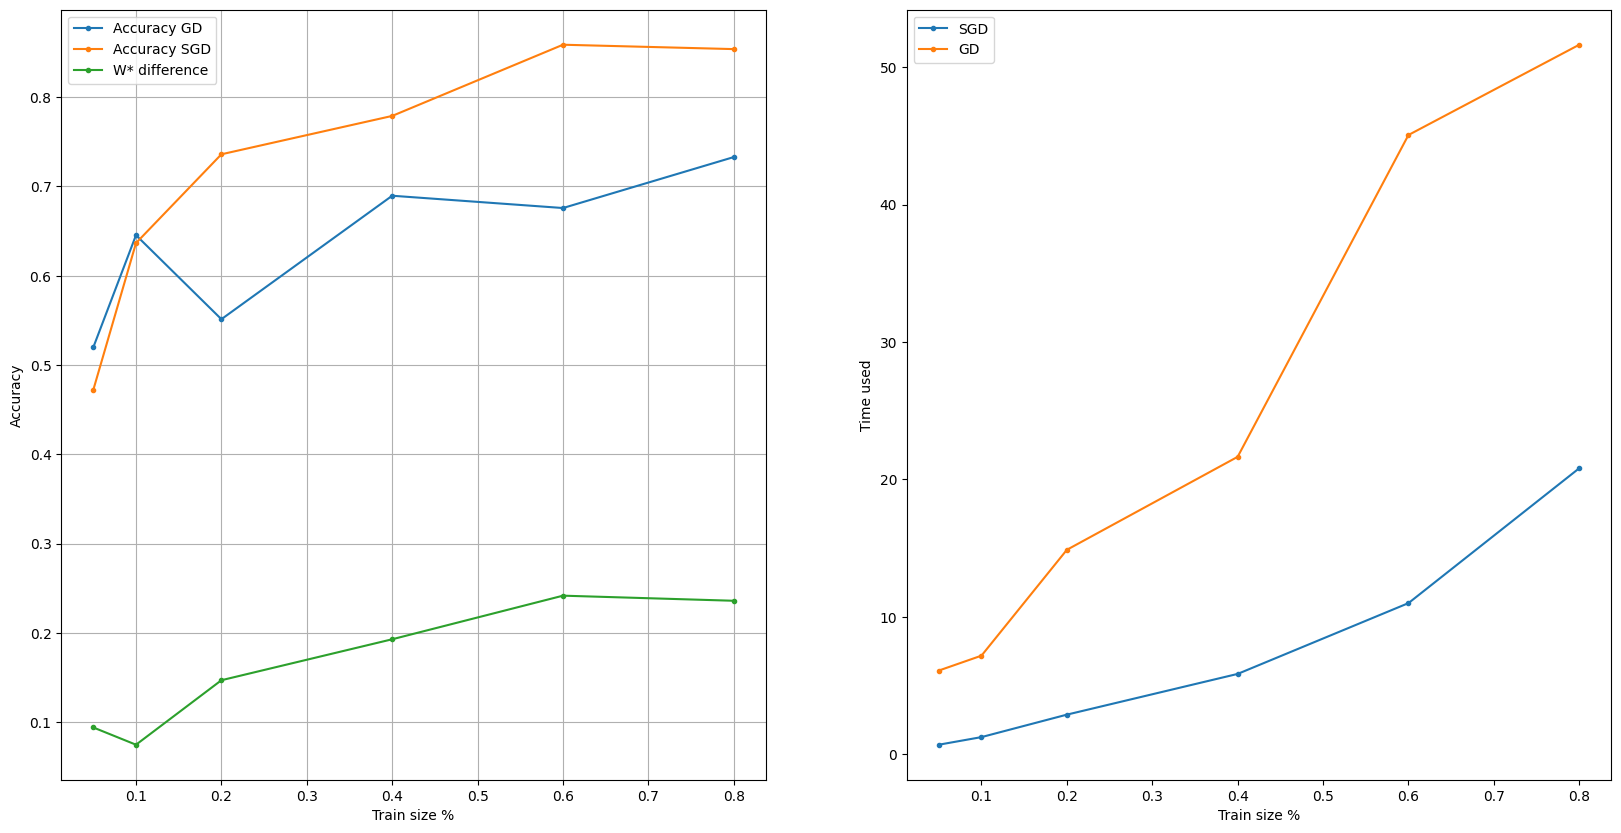

Choose 2 digits with that pattern: digit digit
Insertion terminated


In [54]:
batch_size = 100
n_epochs = 20
kmax = 10
tolf = tolx = 1e-5

while True:
    try:
        print("Choose 2 digits with that pattern: digit digit")
        n1, n2 = [int(x) for x in input().split()]
        print(f'Chosen numbers: {n1}, {n2}')
        # Assume digit are correct
        accuracies_gd, accuracies_sgd, w_star_err, sgd_times, gd_times, train_sizes,  = logistic_regression_classifier(X_hat, Y, n1, n2, batch_size, n_epochs, kmax, tolf, tolx)
        plot(accuracies_gd, accuracies_sgd, w_star_err, sgd_times, gd_times, train_sizes)
    except:
        print('Insertion terminated')
        break